#### 전반 학습
https://asthtls.tistory.com/1178


#### SVM이란? 
- https://runebook.dev/ko/docs/scikit_learn/modules/svm
- 데이터 세트에서 이진 및 다중 클래스 분류를 수행 할 수있는 클래스 
- 쉽게 말해서 단순선형회귀보다 휘어진 곡선 분류가 가능해진다.       


#### 1.SVM의 종류 
- 선형 SVM 
    - 필요 매개변수 : cost 
- RBF 커널 SVM
    - 선으로는 분류할 수 없는 경우 데이터를 고차원 특징 공간으로 사상해서 분류한다. 
    - 필요 매개변수 : cost, gamma

  

#### 2.Cost (C)의 의미:
- 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지 
- C값을 낮게 설정하면 이상치들이 있을 가능성을 크게 잡는다.
- C값이 크면 울퉁불퉁한 이상값들까지 정상으로 분류하게 되어 과적합의 위험이 존재한다. 
- C값이 크면 학습 데이터를 정확히 분류 하겠지만, 새로운 데이터가 들어왔을때 어느 클래스에 속하는지 분류예측하기엔 어려움이 있다.



#### 3.gamma 의 의미 
- 하나의 데이터 샘플이 영향력을 행사하는 거리 
- 결정경계의 곡률을 조정한다. 
- 가우시안 함수의 표준편차, gamma값이 클수록 작은 표준편차를 갖는다. 
- gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아진다.
- gamma가 작을 수록 영향력을 행사하는 거리가 커진다. 
- gamma 값이 높아질수록 분류된 데이터의 분포가 점점 작아진다. 
- gamma값이 너무 낮으면 과소적합, 너무 높으면 과대적합


# 피쳐 스케일링

https://subinium.github.io/feature-selection/ 

In [2]:
import pandas as pd 

#경고 제거 함수 
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./datasets/DB-0524-1548(태환).csv',encoding='cp949',index_col=0)
data.fillna(0, inplace=True)
data.head()

,회사명,거래소코드,회계년도,자산,부채,자본,매출액,매출원가,매출총이익,영업이익,...,제품,설립일,상장일,지역,Z-Score,Z-Score_ad,K1_Score,k1-Score_ad,종합 and,종합 or
0,삼천당제약(주),250,2017,235143417,36386893,198756523,161111597,75822851,85288747,26511831,...,"하메론, 아토로우",1943-12-29,2000-10-04,경기도,63.901581,건전,17.221368,건전,건전,건전
1,삼천당제약(주),250,2018,261158440,55394974,205763466,159960312,76762385,83197927,15500129,...,"하메론, 아토로우",1943-12-29,2000-10-04,경기도,101.738441,건전,14.400663,건전,건전,건전
2,삼천당제약(주),250,2019,290150966,66954254,223196712,186602477,75946716,110655762,25210117,...,"하메론, 아토로우",1943-12-29,2000-10-04,경기도,79.254570,건전,13.803656,건전,건전,건전
3,삼천당제약(주),250,2020,317078866,59382900,257695966,166862334,72862414,93999919,5522905,...,"하메론, 아토로우",1943-12-29,2000-10-04,경기도,209.189271,건전,14.591120,건전,건전,건전
4,삼천당제약(주),250,2021,343947668,93647149,250300519,167274904,84196690,83078214,-15293087,...,"하메론, 아토로우",1943-12-29,2000-10-04,경기도,70.513870,건전,11.014805,건전,건전,건전


In [4]:
#x와 y 선정하기 
column_list=['ROE', '현금순환주기', '이자보상배율', '복리후생비', '영업이익증가율',
'매출총이익률', '총자산증가율', '비정규직비율', '총자산회전율', '기말인원', '유형자산증가율',
 '평균근속연수', '당좌비율', '기부금', '교육훈련비']
x = data[column_list]

y = data['k1-Score_ad']
y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)


In [5]:
#train test validate 데이터 분리하기 
df_17_20 = x[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
df_21 = x[data['회계년도'] == 2021] #validate


y_17_20=y[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
y_21 = y[data['회계년도'] == 2021] #validate


In [6]:
#스케일링으로 train test 값 전처리하기 
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x= st.fit_transform(x)
x=pd.DataFrame(x, columns=column_list)

X_train=df_17_20[column_list]
X_test=df_21[column_list]
y_train=y_17_20
y_test =y_21

In [7]:
print("train 레이블 분포(%)")
print(y_train.value_counts() / y_train.count() * 100)
print("-"*30)
print("test 레이블 분포(%)")
print(y_test.value_counts() / y_test.count() * 100)

train 레이블 분포(%)
0    85.452163
1    14.547837
Name: k1-Score_ad, dtype: float64
------------------------------
test 레이블 분포(%)
0    82.830931
1    17.169069
Name: k1-Score_ad, dtype: float64


### 2차 시도 언더셈플링 CNN Rule 진행  
- https://casa-de-feel.tistory.com/15
- Random sampling 은 샘플링시마다 데이터 결과 다르다는 단점 존재 
- CNN은 분포가 큰 클래스 값을 효율적으로 제거
- CNN Rule은 소수 범주에 속하는 데이터 전체와 다수 범주에 속하는 데이터 중 임의로 선택한 데이터 한 개 (A) 로 구성된 서브 데이터를 생성
-  후 해당 데이터가 처음에 선택한 다수 범주 데이터 (A) 와 가까운지 아니면 소수 범주와 가까운지 확인하여 가까운 범주로 임시로 분류
- 이 과정이 끝나면 정상 분류된 다수 범주 관측치를 제거하여 언더 샘플링



##### CondensedNearestNeighbour
class imblearn.under_sampling.CondensedNearestNeighbour(*, sampling_strategy='auto', random_state=None, n_neighbors=None, n_seeds_S=1, n_jobs=None)[source]

* random_state : 알고리즘의 무작위화를 제어
* n_neighbors  : 가장 가까운 이웃을 계산하기 위해 고려할 이웃의 크기, 가장 가까운 이웃을 찾는 데 사용

In [8]:
from imblearn.under_sampling import CondensedNearestNeighbour



X_train_samp, y_train_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_train, y_train)
X_test_samp,y_test_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_test, y_test)
# #샘플링 시각화 함수 
# def classification_result2(X, y, title=""):
#     plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
#     plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
#     model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
#     Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
#     plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
#     plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
#     plt.contour(X1, X2, Y, colors='k', levels=[0.5])
#     y_pred = model.predict(X)
#     plt.xlim(-4, 4)
#     plt.ylim(-3, 3)
#     plt.xlabel("x1")
#     plt.ylabel("x2")
#     plt.title(title)
#     return model

# plt.subplot(121)
# classification_result2(X_imb, y_imb)
# plt.subplot(122)
# model_samp = classification_result2(X_samp, y_samp)

In [9]:
print("y_train_samp 레이블 분포(%)")
print(y_train_samp.value_counts() / y_train_samp.count() * 100)
print("-"*30)
print("y_test_samp 레이블 분포(%)")
print(y_test_samp.value_counts() / y_test_samp.count() * 100)

y_train_samp 레이블 분포(%)
0    62.340967
1    37.659033
Name: k1-Score_ad, dtype: float64
------------------------------
y_test_samp 레이블 분포(%)
0    60.182371
1    39.817629
Name: k1-Score_ad, dtype: float64


# sklearn.svm.SVC

*class* sklearn.svm.SVC(***, *C=1.0*, *kernel='rbf'*, *degree=3*, *gamma='scale'*, *coef0=0.0*, *shrinking=True*, *probability=False*, *tol=0.001*, *cache_size=200*, *class_weight=None*, *verbose=False*, *max_iter=- 1*, *decision_function_shape='ovr'*, *break_ties=False*, *random_state=None*)[[source]](https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/svm/_classes.py#L515)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

### 1차 시도 : 스케일링만 진행

In [10]:
from sklearn import svm
clf = svm.SVC(gamma=0.0001, C=3000,probability=True)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
# print(f'y_test set : {y_test}')

#정확도 검증해보기 
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report 
# print(f'정확도 : {accuracy_score(y_test,predictions)}')
# print(f'f1 score : {f1_score(y_test,predictions)}')
xgb_roc_auc = roc_auc_score(y_test, predictions, average="macro")
print(f"AUC: {xgb_roc_auc:.4f}")
print(classification_report(y_test, predictions))

AUC: 0.5000
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       632
           1       0.00      0.00      0.00       131

    accuracy                           0.83       763
   macro avg       0.41      0.50      0.45       763
weighted avg       0.69      0.83      0.75       763



### 2차 시도 : CNN Rule Under Sampling 진행 


In [11]:
from sklearn import svm
clf = svm.SVC(gamma=0.0001, C=3000,probability=True)
clf.fit(X_train_samp,y_train_samp)
predictions = clf.predict(X_test_samp)
# print(f'y_test set : {y_test}')

#정확도 검증해보기 
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report 
# print(f'정확도 : {accuracy_score(y_test,predictions)}')
# print(f'f1 score : {f1_score(y_test,predictions)}')
xgb_roc_auc = roc_auc_score(y_test_samp, predictions, average="macro")
print(f"AUC: {xgb_roc_auc:.4f}")
print(classification_report(y_test_samp, predictions))

AUC: 0.5000
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       198
           1       0.00      0.00      0.00       131

    accuracy                           0.60       329
   macro avg       0.30      0.50      0.38       329
weighted avg       0.36      0.60      0.45       329



---------

# 시각화 
- https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

### 1차 시각화: 스케일링만 진행

In [37]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output for binary classification."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0, 1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV,CalibrationDisplay

lr = LogisticRegression(C=1.0)
svc = NaivelyCalibratedLinearSVC(max_iter=10_000)
svc_isotonic = CalibratedClassifierCV(svc, cv=2, method="isotonic")
svc_sigmoid = CalibratedClassifierCV(svc, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (svc, "SVC"),
    (svc_isotonic, "SVC + Isotonic"),
    (svc_sigmoid, "SVC + Sigmoid"),
]

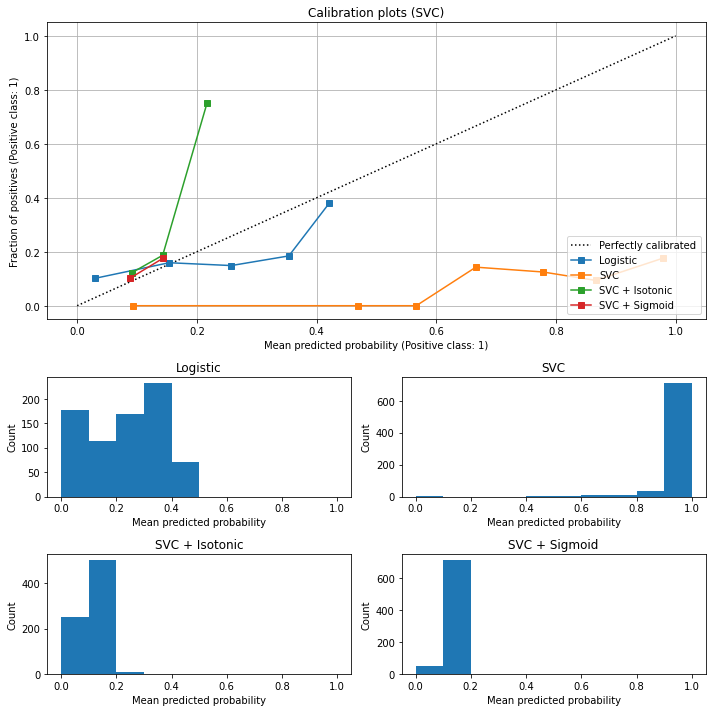

In [48]:
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        # color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (SVC)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        # color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [49]:
from collections import defaultdict 
from sklearn.metrics import brier_score_loss,log_loss,precision_score,recall_score

scores = defaultdict(list)
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

score_df

,Brier loss,Log loss,Precision,Recall,F1,Roc auc
Classifier,,,,,,
Logistic,0.149519,0.544801,0.0,0.0,0.0,0.5
SVC,0.775695,3.327680,0.0,0.0,0.0,0.5
SVC + Isotonic,0.141683,0.456790,0.0,0.0,0.0,0.5
SVC + Sigmoid,0.141853,0.456970,0.0,0.0,0.0,0.5


### 2차 시도 CNN RUlE Under sampling 시각화 